<a href="https://colab.research.google.com/github/codeBall01/PHY386/blob/Bodes-Galaxy/2025/Final/codeBall01/bodes_galaxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astropy scikit-learn tensorflow matplotlib numpy photutils auto-stretch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.7 MB/s eta 0:00:00


# Tasks 1 and part of 3



Stretched image
Image with sky coordinates


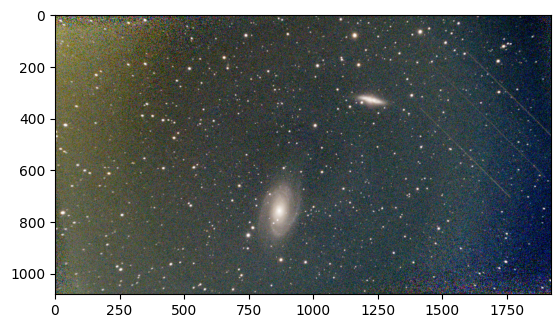

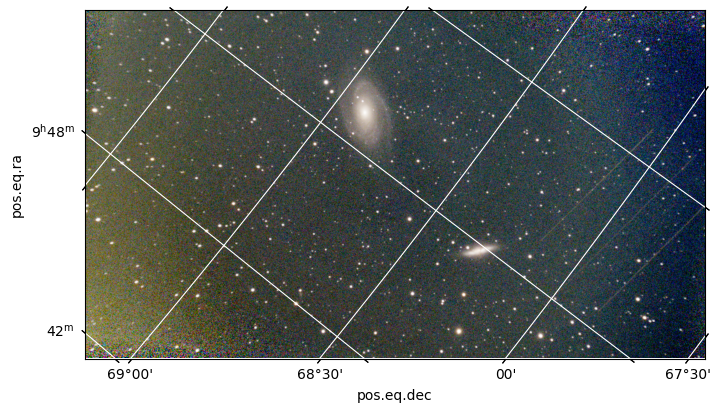

In [2]:
import requests
from astropy.io import fits
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from auto_stretch import apply_stretch
from astropy.wcs import WCS


fits_url = "https://github.com/ubsuny/PHY386/raw/refs/heads/Homework2025/2025/HW/codeBall01/Stacked_878_M%2081_10.0s_IRCUT_20250311-011812.fit"

# Fetch the FITS file from the GitHub repository
response = requests.get(fits_url)
response.raise_for_status()  # Check for request errors

hdul = fits.open(BytesIO(response.content))

# Assume the first extension contains an RGB image in (3, Height, Width) format
rgb_data = np.transpose(hdul[0].data, (2, 1, 0))  # Shape should be (3, Height, Width)
hdul.close() #

# Display the image
print("Stretched image")
fig = plt.figure()
plt.imshow(apply_stretch(rgb_data))

wcs = WCS(hdul[0].header, naxis=2)

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(projection=wcs)
plt.imshow(apply_stretch(rgb_data), origin='lower')
ax.coords.grid(color='white', ls='solid')
print("Image with sky coordinates")


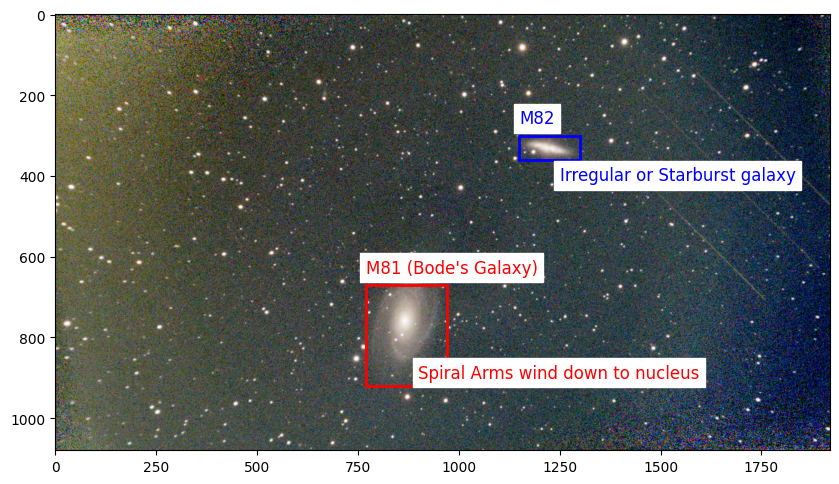

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(apply_stretch(rgb_data))

# First box and label
rect1 = patches.Rectangle((770, 670), 200, 250, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect1)
ax.text(770, 640, "M81 (Bode's Galaxy)", color='r', fontsize=12, backgroundcolor='white')
ax.text(900, 900, "Spiral Arms wind down to nucleus", color='r', fontsize=12, backgroundcolor='white')

# Second box and label
rect2 = patches.Rectangle((1150, 300), 150, 60, linewidth=2, edgecolor='b', facecolor='none')
ax.add_patch(rect2)
ax.text(1150, 270, 'M82', color='b', fontsize=12, backgroundcolor='white')
ax.text(1250, 410, 'Irregular or Starburst galaxy', color='b', fontsize=12, backgroundcolor='white')

plt.show()


NCG 3077 has sky coords:

Position (RA):	10 3 21.45
Position (Dec):	68° 44' 3.26"

which means it is out of frame for this image


M81 total flux: 20956492.320194863
M82 total flux: 5304298.68605954


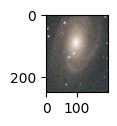

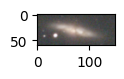

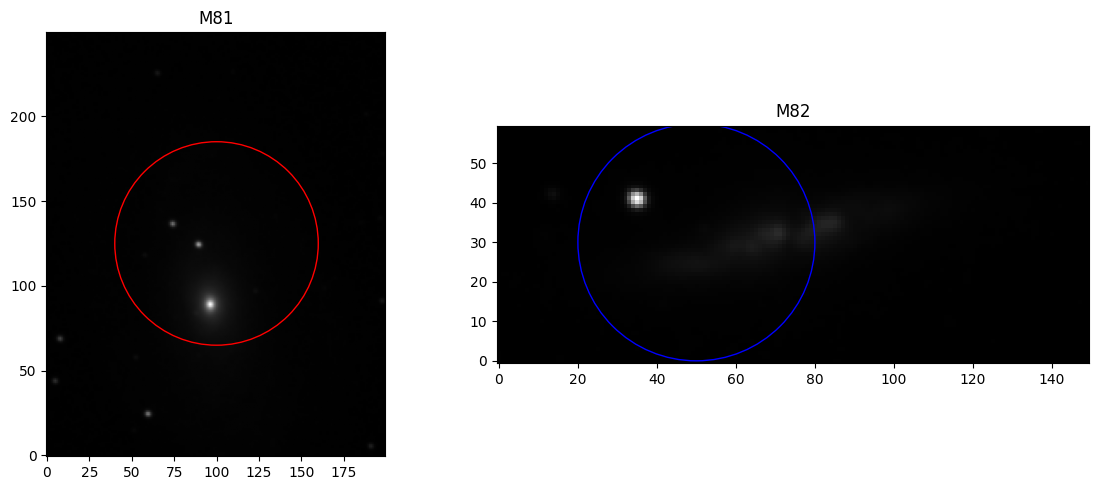

In [4]:
# Crop around M81 (approx coordinates and size from your earlier box)
m81_crop = rgb_data[670:670+250, 770:770+200, :]  # (y1:y2, x1:x2)

# Crop around M82
m82_crop = rgb_data[300:300+60, 1150:1150+150, :]  # (y1:y2, x1:x2)

fig, ax = plt.subplots(figsize=(1, 1))
ax.imshow(apply_stretch(m81_crop))
fig, ax = plt.subplots(figsize=(1, 1))
ax.imshow(apply_stretch(m82_crop))

def to_grayscale(rgb):
    # Simple average over RGB channels
    return np.mean(rgb, axis=2)

m81_gray = to_grayscale(m81_crop)
m82_gray = to_grayscale(m82_crop)

from photutils.aperture import CircularAperture, aperture_photometry

# Define aperture positions (x, y) within cropped regions
m81_position = [(100, 125)]  # center of 200x250 box
m82_position = [(75, 30)]    # center of 150x60 box

# Adjusted aperture centers
m81_position = [(100, 125)]  # Still good
m82_position = [(50, 30)]    # Move aperture left a bit

m81_aperture = CircularAperture(m81_position, r=60)
m82_aperture = CircularAperture(m82_position, r=25)  # Slightly smaller radius to avoid that bright star



# Define aperture radius in pixels
m81_aperture = CircularAperture(m81_position, r=60)
m82_aperture = CircularAperture(m82_position, r=30)

# Run aperture photometry
m81_result = aperture_photometry(m81_gray, m81_aperture)
m82_result = aperture_photometry(m82_gray, m82_aperture)

print("M81 total flux:", m81_result['aperture_sum'][0])
print("M82 total flux:", m82_result['aperture_sum'][0])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(m81_gray, cmap='gray', origin='lower')
m81_aperture.plot(color='red', ax=axs[0])
axs[0].set_title("M81")

axs[1].imshow(m82_gray, cmap='gray', origin='lower')
m82_aperture.plot(color='blue', ax=axs[1])
axs[1].set_title("M82")

plt.tight_layout()
plt.show()


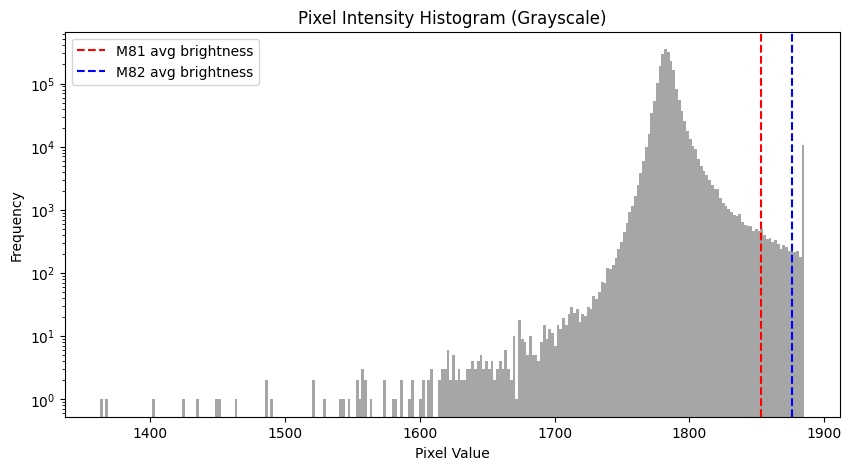

In [5]:
# Convert to grayscale (average of RGB channels)
def to_grayscale(rgb):
    return np.mean(rgb, axis=2)

gray_img = to_grayscale(rgb_data)

# Clip the grayscale data to ignore extreme high values (e.g., stars)
clipped = np.clip(gray_img, a_min=0, a_max=np.percentile(gray_img, 99.5))

# Recompute aperture brightness
m81_avg_brightness = m81_result['aperture_sum'][0] / m81_aperture.area
m82_avg_brightness = m82_result['aperture_sum'][0] / m82_aperture.area

# Plot histogram and brightness markers
plt.figure(figsize=(10, 5))
plt.hist(clipped.ravel(), bins=256, color='gray', alpha=0.7)
plt.axvline(m81_avg_brightness, color='r', linestyle='--', label="M81 avg brightness")
plt.axvline(m82_avg_brightness, color='b', linestyle='--', label="M82 avg brightness")
plt.title("Pixel Intensity Histogram (Grayscale)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.yscale('log')
plt.show()


## Task 2


##A Quick Background on Bode's Galaxy:

 In 1774 the German astronomer Johann Elert Bode first discovered this galaxy. This galaxy is one of the brightest in the night sky (northern hemisphere) and is perfect for ameurature astronomers. It's also a part of the Messier's Catalog and known as M81. Moreover, there is a black hole of 70 million solar masses at it's center.

M81 and M82 (The Bode's Galaxy and the Cigar Galaxy) are gravitionally locked and effect the compostion and shape of each other. It is likely that gravitational effects from M82 contriubted to the development of the spiral arms of M81. Furthermore, from the gravitional effects of M81, M82 was left with violent star forming regions that cause it to glow in x-rays.


## Measuring Stellar Temperatures

Wien's Law relates the temperature of a "block body" or star and the wavelengths of light it will radiate. This means by measuring the "color" of stars, their temperature can be determined. One such way of measuring color of stars is by using filters and measuring the brightness of light after passing through the filter. Commonly, filters of ultraviolet, blue and visiable (yellow) light are used. To classify stars and their relative temperatures the color inidce of B-V is used; B-V comares the different in magnitude of the brigthness of the blue minus the visible for a star.

## Star Classification
There are many ways in which stars are classified, from the Harvard spectral classification system to luminocity classes. To classify stars, color indices help to give information on the temperature of the star. For example, in the Harvard spectral classification, M - type stars are the coolest while O - type stars are the hottest.

## Nebula Emission Lines
Similar to stars, nebulas also have emission an emission spectra. Depending on the composition of the nebula, the surrounding envirnment, and the distance away, these emission spectra will vary. One common example is when a nebula with an abundance of neutral hydrogen atoms is ionized by a nearby O or B star. When the protons and electrons recombine they are in an excited state. Once the electron drops back to its lower energy state it emmits a photon of a specific wavelength. For visible light, the most common of these wavelengths is red, which gives hydrogen filled nebula their iconic red color.



## Task 3 Continued


# Morphology of the galaxies

## M81
The inner buldge of and nuclei are relatively structure free. Within the spiral arms are regions of star formation, with many hot blue stars having already formed.

## M82
Hosts a starburst nuclei, and has a bar running along it's major axis visible in the infrared. M82 is characterized by it's amorphous distribution of light and is a protoype of the Irr II class of galaxy.


## NGC 3077 (Not pictured)
Is often classified as a spirla galaxy however is believed to have a turbulent past which may have led to a mophology change. There are many tendrils of ionized hydrogen emanating outward from its core.


# Task 4

In [6]:
#Using the data from Tasks 1 and 3, total luminosity is computed


# Estimate sky background using an area without galaxy
background_m81 = np.median(m81_gray[0:20, 0:20])
background_m82 = np.median(m82_gray[0:20, 0:20])

# Get aperture areas
m81_area = m81_aperture.area
m82_area = m82_aperture.area

# Subtract estimated background contribution
m81_luminosity = m81_result['aperture_sum'][0] - background_m81 * m81_area
m82_luminosity = m82_result['aperture_sum'][0] - background_m82 * m82_area

print("M81 net luminosity:", m81_luminosity)
print("M82 net luminosity:", m82_luminosity)

luminosity_ratio = m81_luminosity / m82_luminosity
print(f"M81 is {luminosity_ratio:.2f} times brighter than M82.")



M81 net luminosity: 795007.306517005
M82 net luminosity: 255445.13247538358
M81 is 3.11 times brighter than M82.


In [7]:
y_m81, x_m81 = 125, 100  # center of crop (height=250, width=200)


In [8]:
def radial_surface_brightness(image, center, max_radius):
    """
    Computes the radial surface brightness profile of a 2D grayscale image.

    Parameters:
    - image: 2D numpy array of grayscale intensities
    - center: (x, y) tuple specifying the center of the galaxy
    - max_radius: maximum radius (in pixels) to consider

    Returns:
    - radii: 1D array of integer radius values
    - mean_brightness: 1D array of mean brightness at each radius
    """
    y, x = np.indices(image.shape)
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)

    radial_sum = np.bincount(r.ravel(), weights=image.ravel())
    radial_count = np.bincount(r.ravel())

    radial_mean = radial_sum / radial_count
    radii = np.arange(len(radial_mean))

    if max_radius:
        return radii[:max_radius], radial_mean[:max_radius]
    else:
        return radii, radial_mean


In [25]:
import numpy as np
from photutils.aperture import CircularAnnulus

def radial_surface_brightness(image, center, max_radius=100, annulus_width=1):
    """
    Compute the radial surface brightness profile of a galaxy.

    Parameters:
    - image (2D ndarray): Grayscale image (e.g., from RGB averaged or already in grayscale).
    - center (tuple): (y, x) center of the galaxy in pixel coordinates.
    - max_radius (int): Maximum radius (in pixels) to compute the profile.
    - annulus_width (int): Width of each circular annulus.

    Returns:
    - radii (1D ndarray): Radii corresponding to each annulus (center radius).
    - brightness (1D ndarray): Mean surface brightness within each annulus.
    """
    y_center, x_center = center
    radii = []
    brightness = []

    for r in range(1, max_radius):  # Start from r = 1 to avoid r_in=0
        annulus = CircularAnnulus((x_center, y_center), r_in=r, r_out=r + annulus_width)
        mask = annulus.to_mask(method='center')

        annulus_data = mask.multiply(image)
        annulus_data_1d = annulus_data[mask.data > 0]

        if len(annulus_data_1d) > 0:
            mean_val = np.mean(annulus_data_1d)
            #mean_val = np.median(annulus_data_1d)
            radii.append(r + annulus_width / 2)
            brightness.append(mean_val)

    return np.array(radii), np.array(brightness)


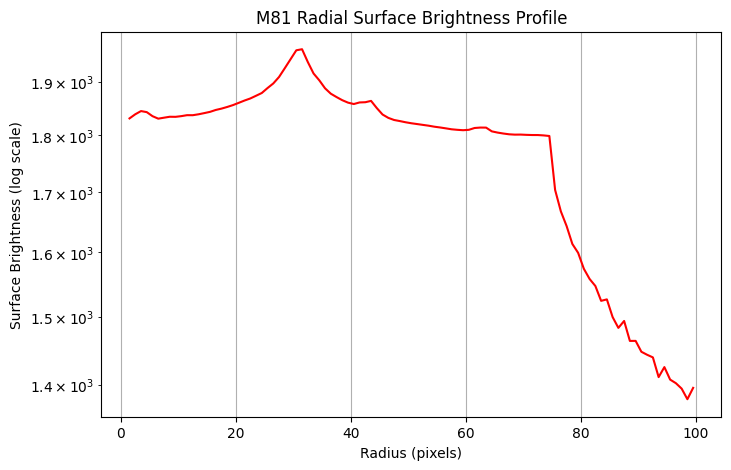

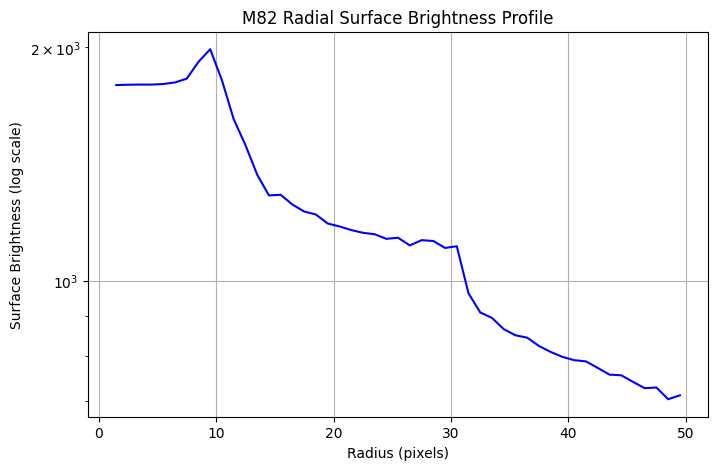

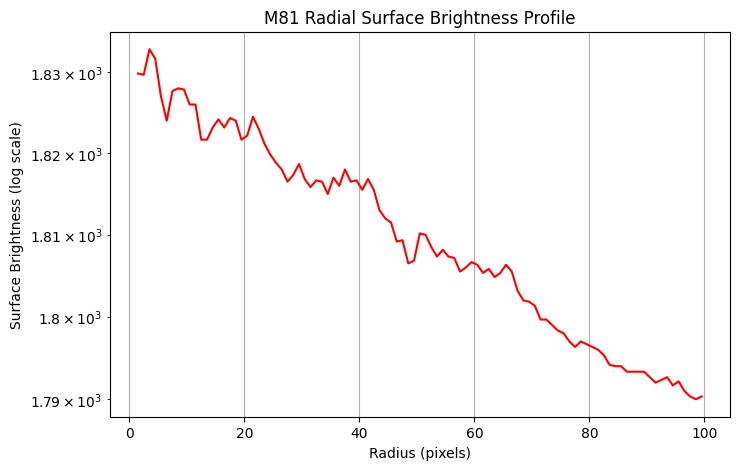

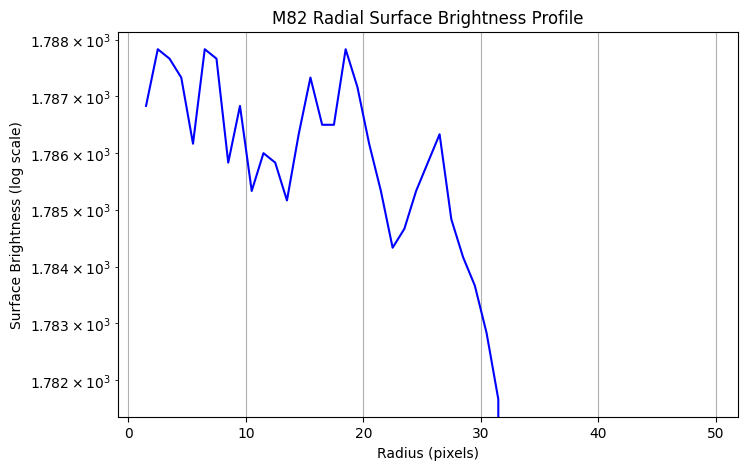

In [26]:
x_m81, y_m81 = 100, 125  # center of your m81_gray crop
r_m81, I_m81 = radial_surface_brightness(m81_gray, center=(x_m81, y_m81), max_radius=100)

plt.figure(figsize=(8, 5))
plt.plot(r_m81, I_m81, color='red')
plt.yscale('log')
plt.xlabel("Radius (pixels)")
plt.ylabel("Surface Brightness (log scale)")
plt.title("M81 Radial Surface Brightness Profile")
plt.grid(True)
plt.show()

x_m82, y_m82 = 50, 30
r_m82, I_m82 = radial_surface_brightness(m82_gray, center=(x_m82, y_m82), max_radius=50)

plt.figure(figsize=(8, 5))
plt.plot(r_m82, I_m82, color='blue')
plt.yscale('log')
plt.xlabel("Radius (pixels)")
plt.ylabel("Surface Brightness (log scale)")
plt.title("M82 Radial Surface Brightness Profile")
plt.grid(True)
plt.show()


#Do the same plots but with the median instead of the mean. (This means that really bright stars won't effect it as much)

import numpy as np
from photutils.aperture import CircularAnnulus

def radial_surface_brightness(image, center, max_radius=100, annulus_width=1):
    """
    Compute the radial surface brightness profile of a galaxy.

    Parameters:
    - image (2D ndarray): Grayscale image (e.g., from RGB averaged or already in grayscale).
    - center (tuple): (y, x) center of the galaxy in pixel coordinates.
    - max_radius (int): Maximum radius (in pixels) to compute the profile.
    - annulus_width (int): Width of each circular annulus.

    Returns:
    - radii (1D ndarray): Radii corresponding to each annulus (center radius).
    - brightness (1D ndarray): Mean surface brightness within each annulus.
    """
    y_center, x_center = center
    radii = []
    brightness = []

    for r in range(1, max_radius):  # Start from r = 1 to avoid r_in=0
        annulus = CircularAnnulus((x_center, y_center), r_in=r, r_out=r + annulus_width)
        mask = annulus.to_mask(method='center')

        annulus_data = mask.multiply(image)
        annulus_data_1d = annulus_data[mask.data > 0]

        if len(annulus_data_1d) > 0:
            #mean_val = np.mean(annulus_data_1d)
            mean_val = np.median(annulus_data_1d)
            radii.append(r + annulus_width / 2)
            brightness.append(mean_val)

    return np.array(radii), np.array(brightness)

x_m81, y_m81 = 100, 125  # center of your m81_gray crop
r_m81, I_m81 = radial_surface_brightness(m81_gray, center=(x_m81, y_m81), max_radius=100)

plt.figure(figsize=(8, 5))
plt.plot(r_m81, I_m81, color='red')
plt.yscale('log')
plt.xlabel("Radius (pixels)")
plt.ylabel("Surface Brightness (log scale)")
plt.title("M81 Radial Surface Brightness Profile")
plt.grid(True)
plt.show()

x_m82, y_m82 = 50, 30
r_m82, I_m82 = radial_surface_brightness(m82_gray, center=(x_m82, y_m82), max_radius=50)

plt.figure(figsize=(8, 5))
plt.plot(r_m82, I_m82, color='blue')
plt.yscale('log')
plt.xlabel("Radius (pixels)")
plt.ylabel("Surface Brightness (log scale)")
plt.title("M82 Radial Surface Brightness Profile")
plt.grid(True)
plt.show()


# Task 5

In [12]:
def radial_surface_brightness(image, center, max_radius=100, annulus_width=1):
    """
    Compute the radial surface brightness profile of a galaxy.

    Parameters:
    - image (2D ndarray): Grayscale image.
    - center (tuple): (y, x) coordinates of galaxy center.
    - max_radius (int): Max radius in pixels.
    - annulus_width (int): Width of each annulus in pixels.

    Returns:
    - radii (ndarray): Radii of annuli.
    - brightness (ndarray): Mean brightness in each annulus.
    """
    y_center, x_center = center
    radii = []
    brightness = []

    for r_in in range(1, max_radius - annulus_width):
        r_out = r_in + annulus_width

        if r_in <= 0 or r_out <= r_in:
            continue  # skip invalid annulus

        annulus = CircularAnnulus((x_center, y_center), r_in=r_in, r_out=r_out)
        mask = annulus.to_mask(method='center')

        annulus_data = mask.multiply(image)
        annulus_data_1d = annulus_data[mask.data > 0]

        if len(annulus_data_1d) > 0:
            mean_val = np.mean(annulus_data_1d)
            radius = (r_in + r_out) / 2
            radii.append(radius)
            brightness.append(mean_val)

    return np.array(radii), np.array(brightness)


In [13]:
def sersic(r, I_e, r_e, n):
    """Sérsic profile function."""
    b_n = 1.9992 * n - 0.3271
    return I_e * np.exp(-b_n * ((r / r_e) ** (1.0 / n) - 1))


In [14]:
# Define the center of M81 in the cropped grayscale image
center_m81 = (125, 100)  # (y, x) format

# Compute radial brightness
radii_m81, brightness_m81 = radial_surface_brightness(m81_gray, center_m81, max_radius=100)


In [15]:
from scipy.optimize import curve_fit

# Mask out zero or negative values to avoid log issues
mask = (brightness_m81 > 0)
radii_fit = radii_m81[mask]
brightness_fit = brightness_m81[mask]

# Initial parameter guesses: (I_e, r_e, n)
p0 = [np.max(brightness_fit), 20, 2.0]

# Sérsic function must be defined before this:
# def sersic(r, I_e, r_e, n): ...

popt, pcov = curve_fit(sersic, radii_fit, brightness_fit, p0=p0)
I_e_fit, r_e_fit, n_fit = popt



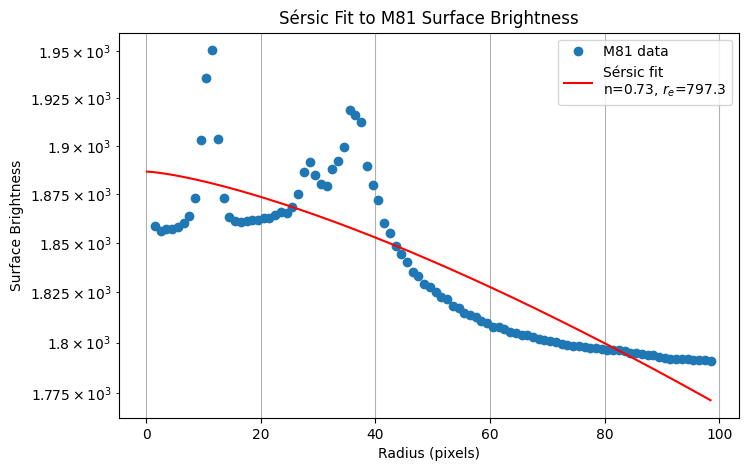

In [16]:
r_fit = np.linspace(0.1, np.max(radii_fit), 200)
model_brightness = sersic(r_fit, *popt)

plt.figure(figsize=(8, 5))
plt.plot(radii_fit, brightness_fit, 'o', label='M81 data')
plt.plot(r_fit, model_brightness, '-', color='red', label=f'Sérsic fit\nn={n_fit:.2f}, $r_e$={r_e_fit:.1f}')
plt.yscale('log')
plt.xlabel("Radius (pixels)")
plt.ylabel("Surface Brightness")
plt.title("Sérsic Fit to M81 Surface Brightness")
plt.legend()
plt.grid(True)
plt.show()


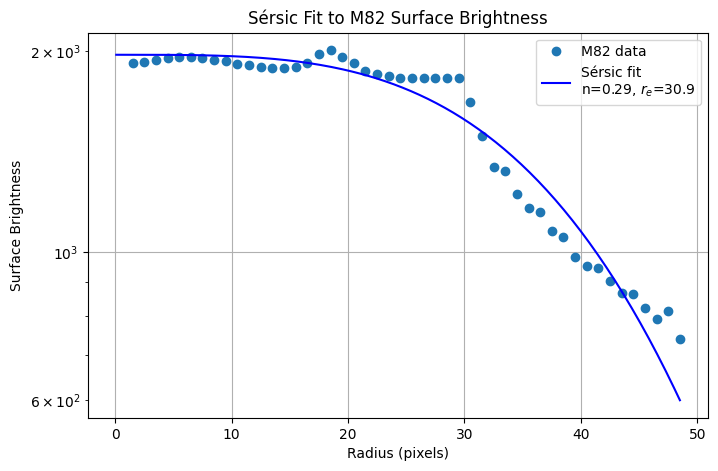

M82 Sérsic Fit Parameters: I_e=1540.81, r_e=30.86, n=0.29


In [17]:
import matplotlib.pyplot as plt
import numpy as np
# Define the center of M82 in the cropped grayscale image
center_m82 = (30, 50)  # (y, x) format - Adjusted based on observation and earlier plots

# Compute radial brightness for M82
radii_m82, brightness_m82 = radial_surface_brightness(m82_gray, center_m82, max_radius=50) # Reduced max_radius for smaller crop

# Mask out zero or negative values to avoid log issues
mask_m82 = (brightness_m82 > 0)
radii_fit_m82 = radii_m82[mask_m82]
brightness_fit_m82 = brightness_m82[mask_m82]

# Initial parameter guesses: (I_e, r_e, n) - Adjusted for M82's profile
# M82 is an irregular galaxy, so a Sérsic fit might not be ideal,

p0_m82 = [np.max(brightness_fit_m82), 10, 1.0] # Lower r_e and n as a starting point

try:
    popt_m82, pcov_m82 = curve_fit(sersic, radii_fit_m82, brightness_fit_m82, p0=p0_m82, maxfev=5000)
    I_e_fit_m82, r_e_fit_m82, n_fit_m82 = popt_m82

    r_fit_m82 = np.linspace(0.1, np.max(radii_fit_m82), 200)
    model_brightness_m82 = sersic(r_fit_m82, *popt_m82)

    plt.figure(figsize=(8, 5))
    plt.plot(radii_fit_m82, brightness_fit_m82, 'o', label='M82 data')
    plt.plot(r_fit_m82, model_brightness_m82, '-', color='blue', label=f'Sérsic fit\nn={n_fit_m82:.2f}, $r_e$={r_e_fit_m82:.1f}')
    plt.yscale('log')
    plt.xlabel("Radius (pixels)")
    plt.ylabel("Surface Brightness")
    plt.title("Sérsic Fit to M82 Surface Brightness")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"M82 Sérsic Fit Parameters: I_e={I_e_fit_m82:.2f}, r_e={r_e_fit_m82:.2f}, n={n_fit_m82:.2f}")

except RuntimeError as e:
    print(f"Could not fit Sérsic profile to M82 data: {e}")
    print("Plotting M82 data without fit.")

    plt.figure(figsize=(8, 5))
    plt.plot(radii_fit_m82, brightness_fit_m82, 'o', label='M82 data')
    plt.yscale('log')
    plt.xlabel("Radius (pixels)")
    plt.ylabel("Surface Brightness")
    plt.title("M82 Radial Surface Brightness Profile (Data Only)")
    plt.legend()
    plt.grid(True)
    plt.show()



The Surface Brigthness of M82 has a much steeper drop off compared to M81. This is due to it's more irregular shape and further demonstrates its star burst activity

#Going through analysis again with larger FITS file


In [18]:
new_image_url = "https://github.com/ubsuny/PHY386/raw/refs/heads/main/data/DSO_Stacked_408_M%2081_mosaic_10.0s_20250511_120211_graxpert.fits"

Stretched image
Image with sky coordinates


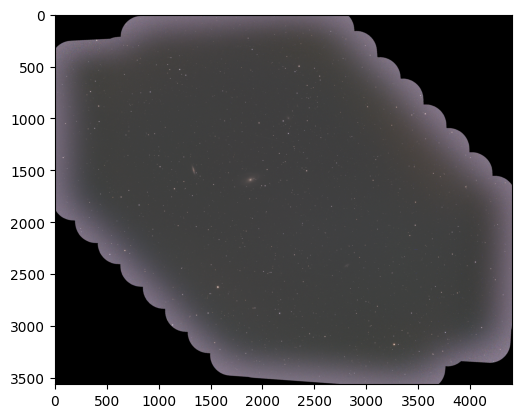

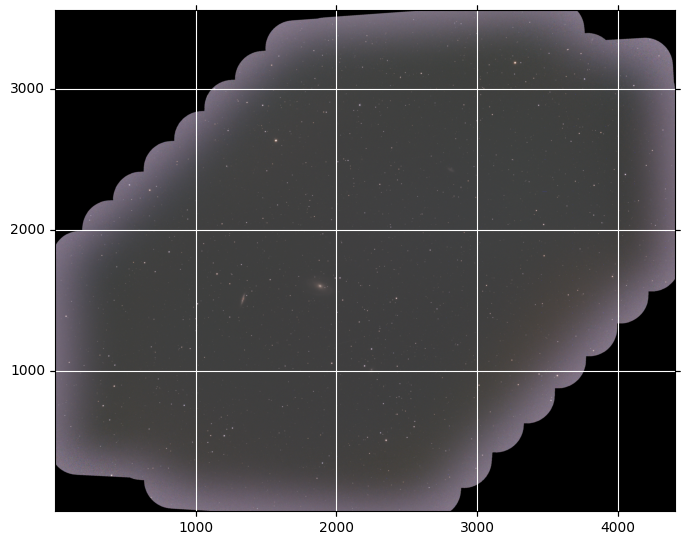

In [19]:
# Fetch the FITS file from the GitHub repository
response = requests.get(new_image_url)
response.raise_for_status()  # Check for request errors

hdul = fits.open(BytesIO(response.content))

# Assume the first extension contains an RGB image in (3, Height, Width) format
rgb_data = np.transpose(hdul[0].data, (2, 1, 0))  # Shape should be (3, Height, Width)
hdul.close() #

# Display the image
print("Stretched image")
fig = plt.figure()
plt.imshow(apply_stretch(rgb_data))

wcs = WCS(hdul[0].header, naxis=2)

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(projection=wcs)
plt.imshow(apply_stretch(rgb_data), origin='lower')
ax.coords.grid(color='white', ls='solid')
print("Image with sky coordinates")


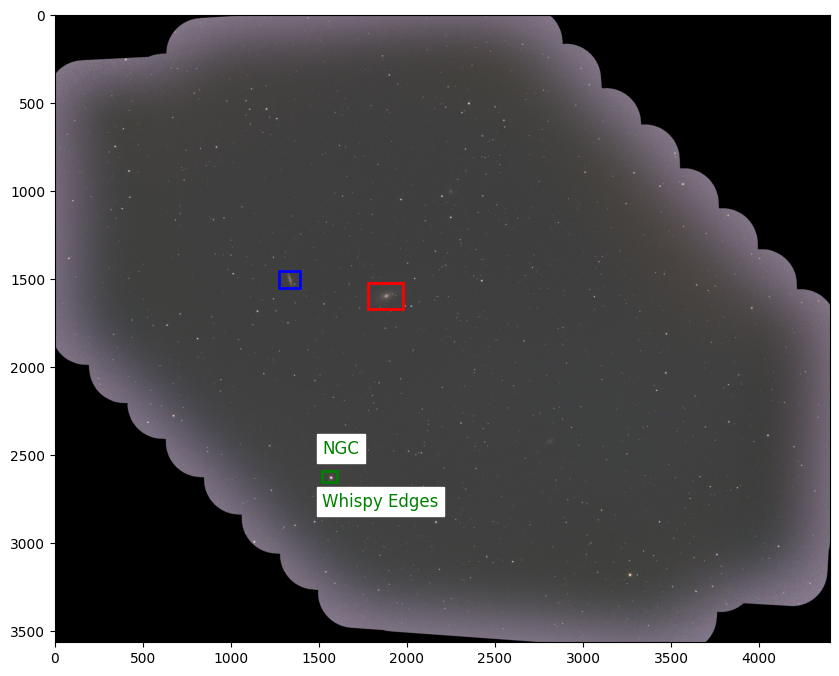

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(apply_stretch(rgb_data))

# First box and label
rect1 = patches.Rectangle((1780, 1520), 200, 150, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect1)

# Second box and label
rect2 = patches.Rectangle((1275, 1450), 120, 100, linewidth=2, edgecolor='b', facecolor='none')
ax.add_patch(rect2)

# Third box and label
rect3 = patches.Rectangle((1520, 2590), 80, 60, linewidth=2, edgecolor='g', facecolor='none')
ax.add_patch(rect3)
ax.text(1520, 2490, 'NGC', color='g', fontsize=12, backgroundcolor='white')
ax.text(1520, 2790, 'Whispy Edges', color='g', fontsize=12, backgroundcolor='white')

plt.show()


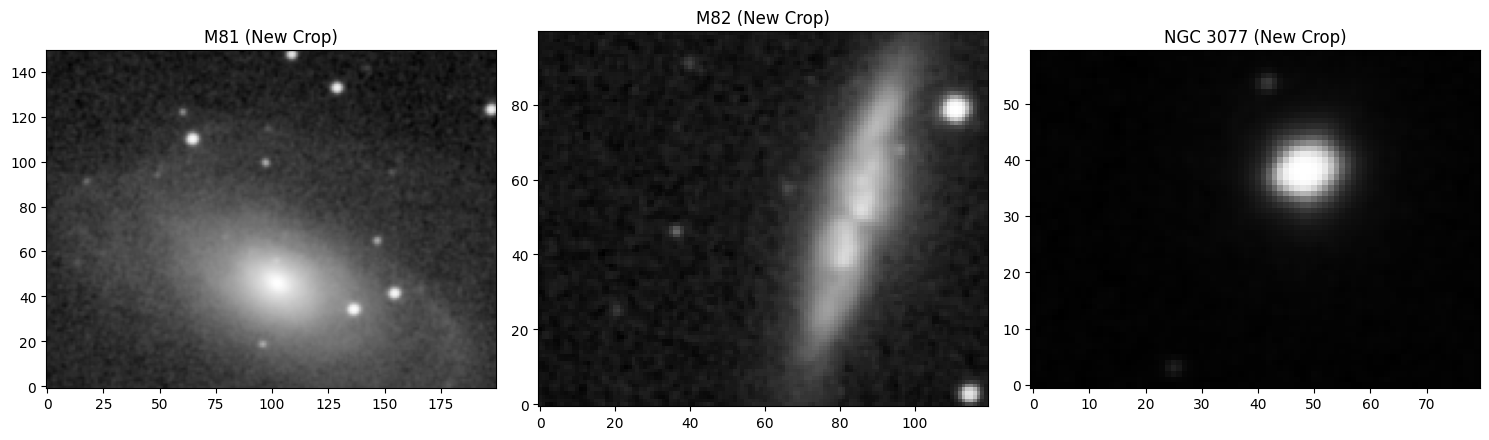

M81 total flux (New Crop): 15095703.88809539
M82 total flux (New Crop): 4893578.372703108
NGC 3077 total flux (New Crop): 3328452.4360274216


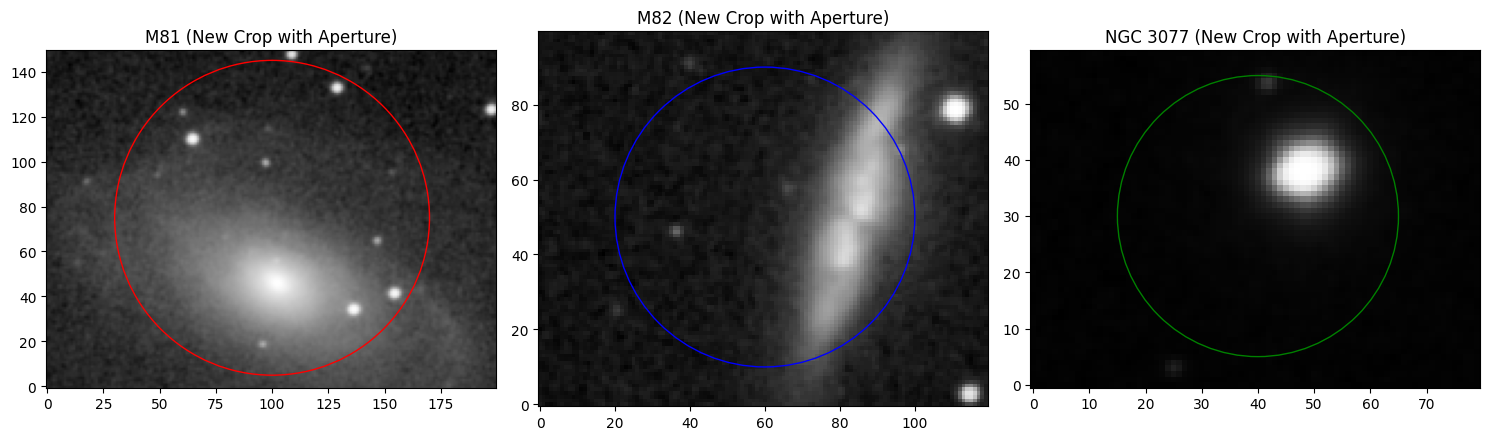

M81 net luminosity (New): 723022.2176772058
M82 net luminosity (New): 230617.11673489772
NGC 3077 net luminosity (New): 1475894.5181136904
M81 is 3.14 times brighter than M82 (New).
M81 is 0.49 times brighter than NGC 3077 (New).
M82 is 0.16 times brighter than NGC 3077 (New).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# New Rectangle coordinates
m81_new_rect = (1550, 1780, 150, 200) # (y_start, x_start, height, width)
m82_new_rect = (1450, 1250, 100, 120) # (y_start, x_start, height, width)
ngc3077_new_rect = (2590, 1520, 60, 80) # (y_start, x_start, height, width)

# Crop the images using the new coordinates from the `rgb_data`
m81_crop_new = rgb_data[m81_new_rect[0]:m81_new_rect[0]+m81_new_rect[2], m81_new_rect[1]:m81_new_rect[1]+m81_new_rect[3], :]
m82_crop_new = rgb_data[m82_new_rect[0]:m82_new_rect[0]+m82_new_rect[2], m82_new_rect[1]:m82_new_rect[1]+m82_new_rect[3], :]
ngc3077_crop_new = rgb_data[ngc3077_new_rect[0]:ngc3077_new_rect[0]+ngc3077_new_rect[2], ngc3077_new_rect[1]:ngc3077_new_rect[1]+ngc3077_new_rect[3], :]

# Convert the new cropped images to grayscale
m81_gray_new = to_grayscale(m81_crop_new)
m82_gray_new = to_grayscale(m82_crop_new)
ngc3077_gray_new = to_grayscale(ngc3077_crop_new)

# Display the new cropped images in grayscale with applied stretch
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(apply_stretch(m81_gray_new), cmap='gray', origin='lower')
axs[0].set_title("M81 (New Crop)")

axs[1].imshow(apply_stretch(m82_gray_new), cmap='gray', origin='lower')
axs[1].set_title("M82 (New Crop)")

axs[2].imshow(apply_stretch(ngc3077_gray_new), cmap='gray', origin='lower')
axs[2].set_title("NGC 3077 (New Crop)")

plt.tight_layout()
plt.show()

# Define new aperture positions relative to the new cropped image origins
# Estimate centers within the new crop dimensions
m81_position_new = [(m81_new_rect[3] // 2, m81_new_rect[2] // 2)] # (x, y) format, center of width and height
m82_position_new = [(m82_new_rect[3] // 2, m82_new_rect[2] // 2)] # (x, y)
ngc3077_position_new = [(ngc3077_new_rect[3] // 2, ngc3077_new_rect[2] // 2)] # (x, y)

# Define new aperture radii based on the object size in the new crops
m81_aperture_new = CircularAperture(m81_position_new, r=70) # Adjust radius based on visual inspection
m82_aperture_new = CircularAperture(m82_position_new, r=40)
ngc3077_aperture_new = CircularAperture(ngc3077_position_new, r=25)


# Run aperture photometry on the new grayscale crops
m81_result_new = aperture_photometry(m81_gray_new, m81_aperture_new)
m82_result_new = aperture_photometry(m82_gray_new, m82_aperture_new)
ngc3077_result_new = aperture_photometry(ngc3077_gray_new, ngc3077_aperture_new)

print("M81 total flux (New Crop):", m81_result_new['aperture_sum'][0])
print("M82 total flux (New Crop):", m82_result_new['aperture_sum'][0])
print("NGC 3077 total flux (New Crop):", ngc3077_result_new['aperture_sum'][0])

# Visualize apertures on the new grayscale images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(apply_stretch(m81_gray_new), cmap='gray', origin='lower')
m81_aperture_new.plot(color='red', ax=axs[0])
axs[0].set_title("M81 (New Crop with Aperture)")

axs[1].imshow(apply_stretch(m82_gray_new), cmap='gray', origin='lower')
m82_aperture_new.plot(color='blue', ax=axs[1])
axs[1].set_title("M82 (New Crop with Aperture)")

axs[2].imshow(apply_stretch(ngc3077_gray_new), cmap='gray', origin='lower')
ngc3077_aperture_new.plot(color='green', ax=axs[2])
axs[2].set_title("NGC 3077 (New Crop with Aperture)")

plt.tight_layout()
plt.show()

# Recompute luminosity estimates using the new crops and photometry results

# Estimate sky background for each new crop (using a corner or edge)
# This is a simple estimate and could be improved with more robust background methods
background_m81_new = np.median(m81_gray_new[0:10, 0:10])
background_m82_new = np.median(m82_gray_new[0:10, 0:10])
background_ngc3077_new = np.median(ngc3077_gray_new[0:10, 0:10])

# Get new aperture areas
m81_area_new = m81_aperture_new.area
m82_area_new = m82_aperture_new.area
ngc3077_area_new = ngc3077_aperture_new.area

# Subtract estimated background contribution from the new results
m81_luminosity_new = m81_result_new['aperture_sum'][0] - background_m81_new * m81_area_new
m82_luminosity_new = m82_result_new['aperture_sum'][0] - background_m82_new * m82_area_new
ngc3077_luminosity_new = ngc3077_result_new['aperture_sum'][0] - background_ngc3077_new * ngc3077_area_new

print("M81 net luminosity (New):", m81_luminosity_new)
print("M82 net luminosity (New):", m82_luminosity_new)
print("NGC 3077 net luminosity (New):", ngc3077_luminosity_new)

# Calculate ratios
luminosity_ratio_m81_m82_new = m81_luminosity_new / m82_luminosity_new
luminosity_ratio_m81_ngc3077_new = m81_luminosity_new / ngc3077_luminosity_new
luminosity_ratio_m82_ngc3077_new = m82_luminosity_new / ngc3077_luminosity_new

print(f"M81 is {luminosity_ratio_m81_m82_new:.2f} times brighter than M82 (New).")
print(f"M81 is {luminosity_ratio_m81_ngc3077_new:.2f} times brighter than NGC 3077 (New).")
print(f"M82 is {luminosity_ratio_m82_ngc3077_new:.2f} times brighter than NGC 3077 (New).")


# Task 6


##The interactions between Bodes Galaxy and it's companions:

M81 is in gravitational lock with M82. The shape of M82 suggests a strong tidal force has pulled it into a long (cigar shaped) galaxy.

M81 also has a strong gravitational effect on NGC 3077 however it's difficult to see the hydrogen gas it's stripped away over time.

## Star Formation

Gravitational effects will induce star formation in certain areas of the galaxy. In M82 there is a extremely high rates of star formation due to the gravity from M81. Moreover, M81 has high rates of star formation in its spiral arms, which have taken shape due to the gravity from M82.

## Morphology
Due to these three galaxies being in such strong gravitational lock, substansial amounts of hydrogen gas has been stripped away from each and moved into the central region. Due to this, this region also has high rates of star formation.

Both NGC 3077 and M82 have an irregular shape (it is believed NCG 3077 has even changed its shape throughout time). This is believed to be due to how each galaxy interacts with another.